# Homework Assignment 7

**Question 1:** Select three books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape, Gephi, or any other Graph Visualization tool (20pt).


## Pride And Prejudice Book.

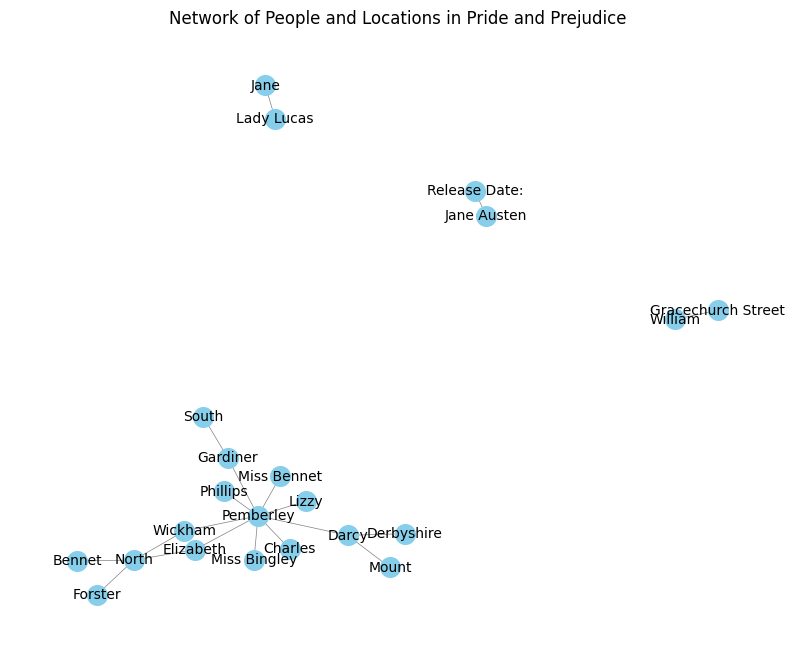

In [1]:
import spacy
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Read the text file
with open("pride_and_prejudice.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Process the text with spaCy
doc = nlp(text)

# Initialize network
G = nx.Graph()

# Dictionary to store person-location relationships
person_location = defaultdict(list)

# Extract people and locations
for ent in doc.ents:
    if ent.label_ == "PERSON":
        person = ent.text
    elif ent.label_ == "LOC":
        location = ent.text
        person_location[person].append(location)

# Add edges to the network
for person, locations in person_location.items():
    for location in locations:
        G.add_edge(person, location)

# Visualize the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=200)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.title("Network of People and Locations in Pride and Prejudice")
plt.axis("off")
plt.show()


In [2]:
# Export the network data as a GML file
nx.write_gml(G, "pride_and_prejudice.gml")

In [3]:
# Cytoscape Layout

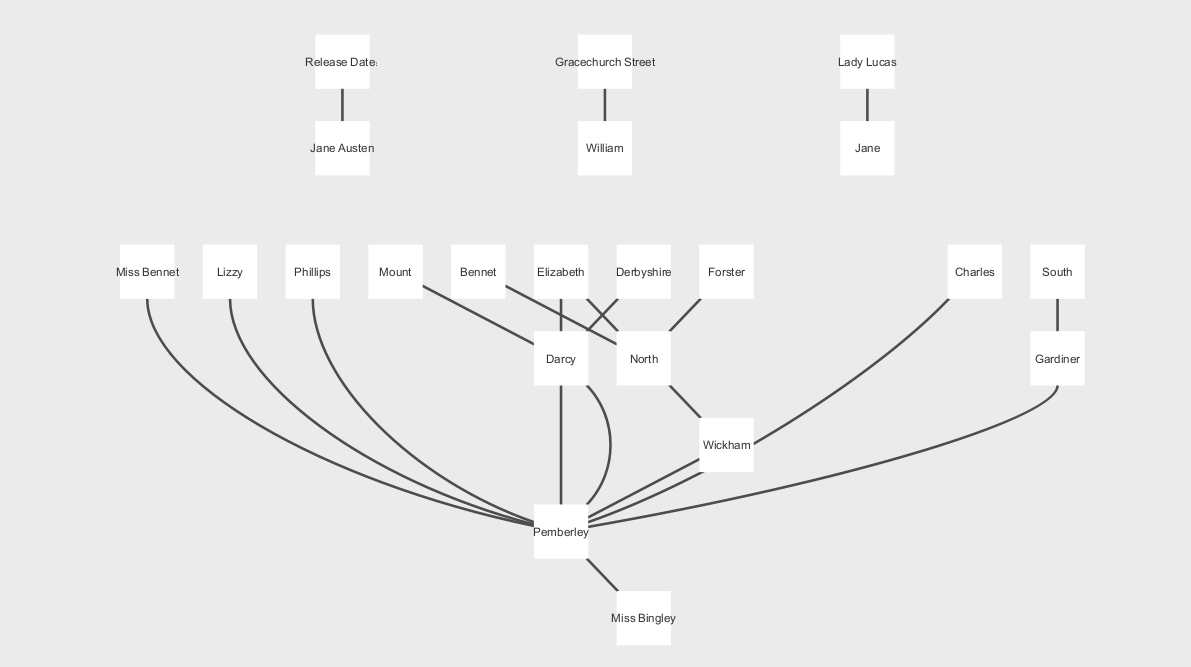

## To Kill A Mocking Bird

C:\Users\kazom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kazom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kazom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kazom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


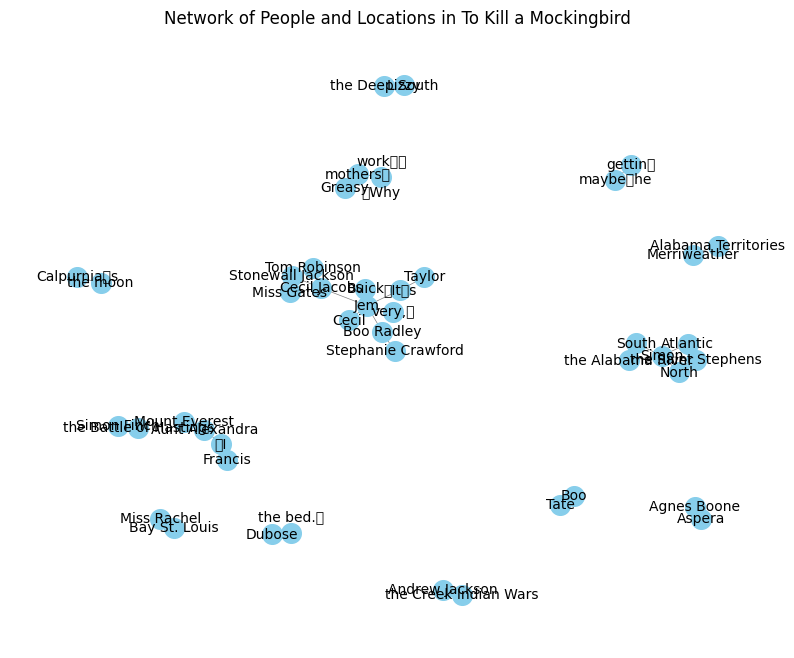

In [4]:
# Load English language model
nlp = spacy.load("en_core_web_sm")

# Read the text file
with open("To Kill a Mockingbird - Harper Lee.txt", "r", encoding="latin1") as file:
    text = file.read()

# Process the text with spaCy
doc = nlp(text)

# Initialize network
G = nx.Graph()

# Dictionary to store person-location relationships
person_location = defaultdict(list)

# Extract people and locations
for ent in doc.ents:
    if ent.label_ == "PERSON":
        person = ent.text
    elif ent.label_ == "LOC":
        location = ent.text
        person_location[person].append(location)

# Add edges to the network
for person, locations in person_location.items():
    for location in locations:
        G.add_edge(person, location)

# Visualize the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=200)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.title("Network of People and Locations in To Kill a Mockingbird")
plt.axis("off")
plt.show()


In [5]:
# Export the network data as a GML file
nx.write_gml(G, "To_Kill_a_Mockingbird.gml")

In [6]:
# Cytoscape Layout

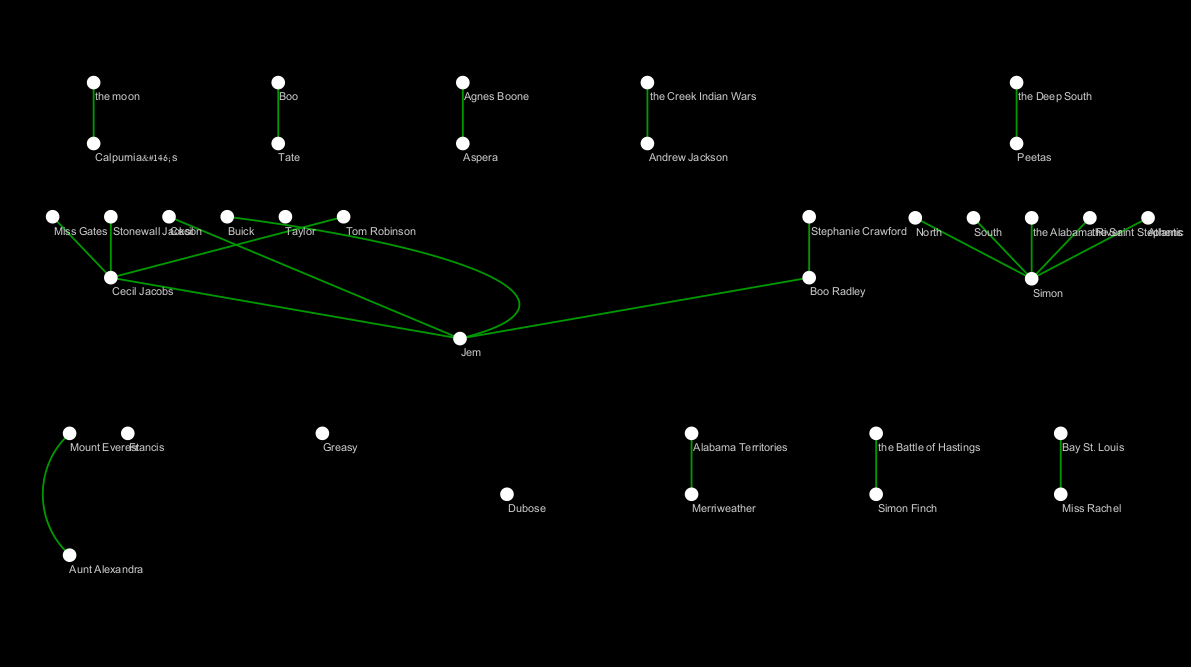

## The Hunger Games

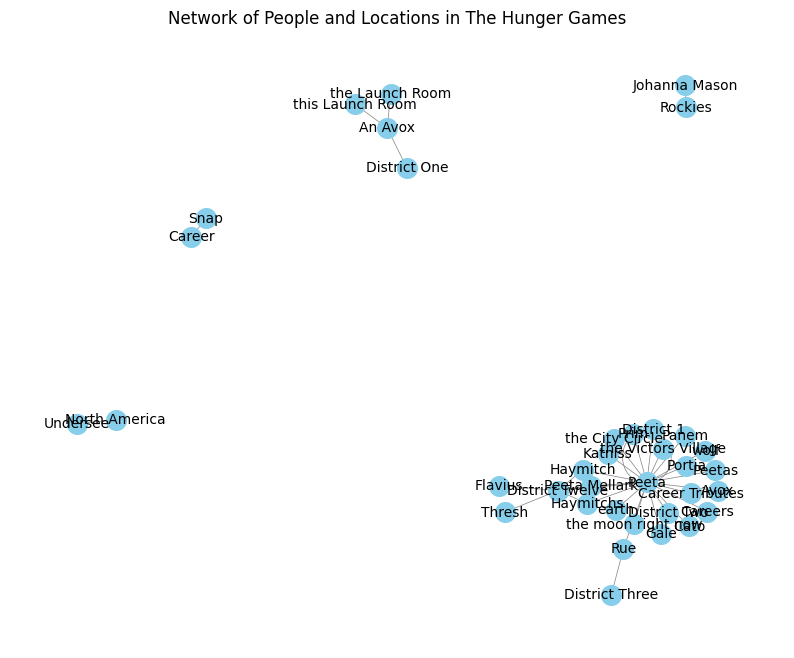

In [7]:
# Load English language model
nlp = spacy.load("en_core_web_sm")

# Read the text file
with open("The Hunger Games.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Process the text with spaCy
doc = nlp(text)

# Initialize network
G = nx.Graph()

# Dictionary to store person-location relationships
person_location = defaultdict(list)

# Extract people and locations
for ent in doc.ents:
    if ent.label_ == "PERSON":
        person = ent.text
    elif ent.label_ == "LOC":
        location = ent.text
        person_location[person].append(location)

# Add edges to the network
for person, locations in person_location.items():
    for location in locations:
        G.add_edge(person, location)

# Visualize the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=200)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.title("Network of People and Locations in The Hunger Games")
plt.axis("off")
plt.show()


In [8]:
# Export the network data as a GML file
nx.write_gml(G, "hunger_games_network.gml")

In [9]:
# Cytoscape layout

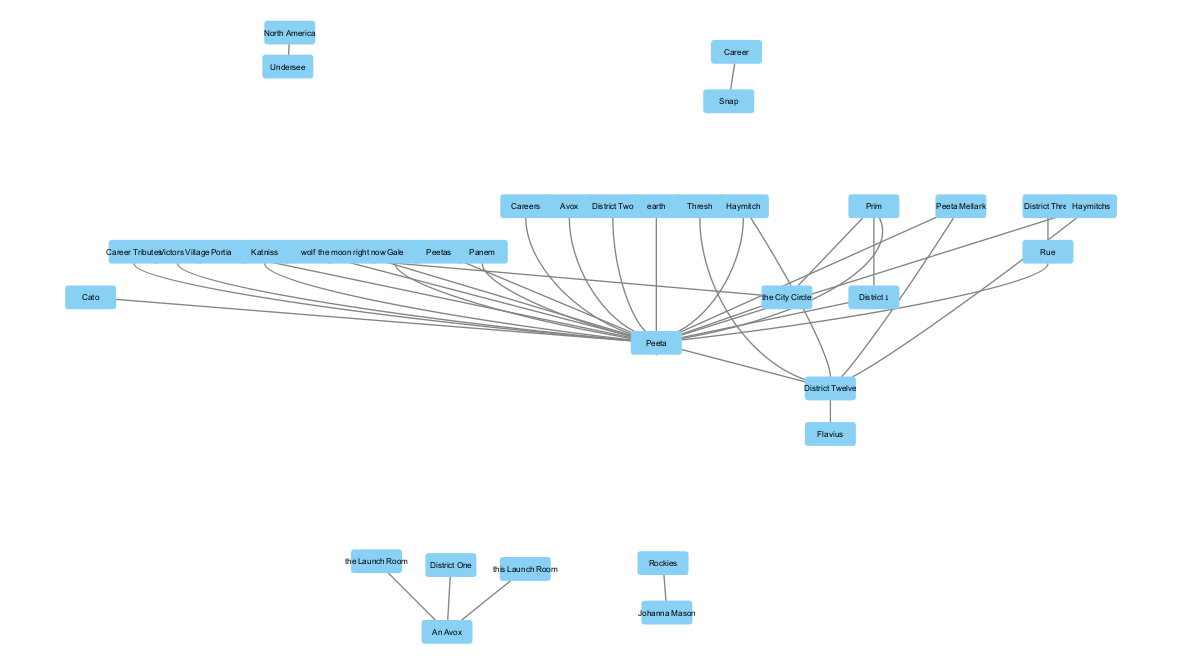

# Question 2

**Question 2:** Use the [The Big Bang Theory Transcript](https://www.kaggle.com/datasets/mitramir5/the-big-bang-theory-series-transcript)
to create and evaluate a classifier that given a line of text can predict
 who said it (20pt). Using sentiment analysis identify who are the most and less friendly character(20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

I've tried 3 different methods:

1. This code loads dialogue data from The Big Bang Theory, filters out less frequent characters, and trains a Random Forest classifier to predict characters from dialogue lines.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataframe from CSV
df = pd.read_csv('1_10_seasons_tbbt.csv')

# Count the occurrences of each person_scene
person_counts = df['person_scene'].value_counts()

# Filter persons to keep based on counts
persons_to_keep = person_counts[person_counts >= 220].index.tolist()

# Filter the dataframe based on persons to keep
df = df[df['person_scene'].isin(persons_to_keep)]
df = df.head(20000)

# Separate features and target
X = df['dialogue']
y = df['person_scene']

# Handle missing values
X.fillna("", inplace=True)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.428


2. This code loads dialogue data from The Big Bang Theory, filters out less frequent characters, tokenizes the text, trains an LSTM-based model, and evaluates its accuracy.

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

# Load the dataframe from CSV
df = pd.read_csv('1_10_seasons_tbbt.csv')

# Count the occurrences of each person_scene
person_counts = df['person_scene'].value_counts()

# Filter persons to keep based on counts
persons_to_keep = person_counts[person_counts >= 220].index.tolist()

# Filter the dataframe based on persons to keep
filtered_df = df[df['person_scene'].isin(persons_to_keep)]
filtered_df = filtered_df.head(20000)

# Separate features and target
X = filtered_df['dialogue']
y = filtered_df['person_scene']

# Handle missing values
X.fillna("", inplace=True)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
MAX_LENGTH = 100
X_pad = pad_sequences(sequences, maxlen=MAX_LENGTH)

# Encode the target labels
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_enc, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=MAX_LENGTH),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    LSTM(128, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(persons_to_keep), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
200/200 [==============================] - 17s 75ms/step - loss: 1.9109 - accuracy: 0.2587 - val_loss: 1.7808 - val_accuracy: 0.3391
Epoch 2/10
200/200 [==============================] - 14s 72ms/step - loss: 1.7622 - accuracy: 0.3387 - val_loss: 1.7002 - val_accuracy: 0.3578
Epoch 3/10
200/200 [==============================] - 15s 75ms/step - loss: 1.6104 - accuracy: 0.3989 - val_loss: 1.6185 - val_accuracy: 0.3991
Epoch 4/10
200/200 [==============================] - 14s 72ms/step - loss: 1.4436 - accuracy: 0.4561 - val_loss: 1.6457 - val_accuracy: 0.3922
Epoch 5/10
200/200 [==============================] - 15s 73ms/step - loss: 1.3323 - accuracy: 0.5022 - val_loss: 1.7596 - val_accuracy: 0.3837
Epoch 6/10
200/200 [==============================] - 15s 73ms/step - loss: 1.2390 - accuracy: 0.5379 - val_loss: 1.8163 - val_accuracy: 0.3731
Epoch 7/10
200/200 [==============================] - 15s 77ms/step - loss: 1.1356 - accuracy: 0.5816 - val_loss: 1.9161 - val_accuracy:

This code builds an LSTM-based model for character prediction using dialogue lines from The Big Bang Theory. It involves:

Data preparation: Loading, filtering, and encoding data.
Text tokenization and padding.
Word embedding using pre-trained GloVe embeddings.
Model definition with embedding, convolutional, pooling, LSTM, and dense layers.
Model compilation, training, and evaluation.

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Load the dataframe from CSV
df = pd.read_csv('1_10_seasons_tbbt.csv')

# Count the occurrences of each person_scene
person_counts = df['person_scene'].value_counts()

# Filter persons to keep based on counts
persons_to_keep = person_counts[person_counts >= 220].index.tolist()

# Filter the dataframe based on persons to keep
filtered_df = df[df['person_scene'].isin(persons_to_keep)]
filtered_df = filtered_df.head(20000)

# Separate features and target
X = filtered_df['dialogue']
y = filtered_df['person_scene']

# Handle missing values
X.fillna("", inplace=True)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
MAX_LENGTH = 100
X_pad = pad_sequences(sequences, maxlen=MAX_LENGTH)

# Encode the target labels
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_enc, test_size=0.2, random_state=42)

# Load pre-trained GloVe word embeddings
word_embeddings = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs

# Create an embedding matrix
word_index = tokenizer.word_index
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define the model architecture
model = Sequential([
    Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_LENGTH, trainable=False),
    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(5),
    LSTM(256, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(persons_to_keep), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/15
125/125 [==============================] - 26s 192ms/step - loss: 1.8057 - accuracy: 0.3139 - val_loss: 1.6766 - val_accuracy: 0.3655
Epoch 2/15
125/125 [==============================] - 24s 188ms/step - loss: 1.6320 - accuracy: 0.3849 - val_loss: 1.5893 - val_accuracy: 0.4005
Epoch 3/15
125/125 [==============================] - 24s 194ms/step - loss: 1.5859 - accuracy: 0.4001 - val_loss: 1.5767 - val_accuracy: 0.3993
Epoch 4/15
125/125 [==============================] - 23s 187ms/step - loss: 1.5318 - accuracy: 0.4267 - val_loss: 1.5860 - val_accuracy: 0.4128
Epoch 5/15
125/125 [==============================] - 24s 194ms/step - loss: 1.4864 - accuracy: 0.4499 - val_loss: 1.6298 - val_accuracy: 0.4047
Epoch 6/15
125/125 [==============================] - 23s 188ms/step - loss: 1.4346 - accuracy: 0.4679 - val_loss: 1.6116 - val_accuracy: 0.4120
Epoch 7/15
125/125 [==============================] - 24s 189ms/step - loss: 1.3494 - accuracy: 0.5020 - val_loss: 1.6436 - val_ac

Sentiment analysis to find the most and least friendly characters in The Big Bang Theory TV series based on their dialogue.

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataframe from CSV
df = pd.read_csv('1_10_seasons_tbbt.csv')

# Count the occurrences of each person_scene
person_counts = df['person_scene'].value_counts()

# Filter persons to keep based on counts
persons_to_keep = person_counts[person_counts >= 220].index.tolist()

# Filter the dataframe based on persons to keep
df = df[df['person_scene'].isin(persons_to_keep)]
df = filtered_df.head(20000)

# Filter the dataframe to include only relevant columns
dialogue_df = df[['person_scene', 'dialogue']]

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each dialogue line
dialogue_df['sentiment_score'] = dialogue_df['dialogue'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Aggregate sentiment scores for each character
character_sentiment = dialogue_df.groupby('person_scene')['sentiment_score'].mean().reset_index()

# Rank characters based on their average sentiment scores
character_sentiment = character_sentiment.sort_values(by='sentiment_score', ascending=False)

# Most friendly character
most_friendly = character_sentiment.iloc[0]

# Least friendly character
least_friendly = character_sentiment.iloc[-1]

print("Most Friendly Character:", most_friendly['person_scene'])
print("Least Friendly Character:", least_friendly['person_scene'])

Most Friendly Character: Amy
Least Friendly Character: Scene


The purpose of this code is to analyze dialogue data from The Big Bang Theory TV series in order to predict the season number of each episode. It aims to build a model that can learn from the dialogue of each episode and then use that learning to predict which season each episode belongs to. I've tried 2 different methods.
1. 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Load the dataframe from CSV
df = pd.read_csv('1_10_seasons_tbbt.csv')

# Drop rows with missing dialogue
df = df.dropna(subset=['dialogue'])

# Aggregate quotes by episode
episode_quotes = df.groupby('episode_name')['dialogue'].apply(lambda x: ' '.join(x)).reset_index()

# Preprocess the text
episode_quotes['dialogue'].fillna("", inplace=True)

# Split data into features and target
X = episode_quotes['dialogue']
y = episode_quotes['episode_name'].str.extract('(\d+)').astype(int)

# Text Preprocessing and Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define and train the classifier (Random Forest)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\kazom\AppData\Local\Temp\ipykernel_11888\3990049404.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Accuracy: 0.3404255319148936


2.

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_svm_classifier = grid_search.best_estimator_

# Predict the test set
y_pred_svm = best_svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Best Parameters:", grid_search.best_params_)

C:\Users\kazom\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.425531914893617
Best Parameters: {'C': 10, 'kernel': 'linear'}
